In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


0.038527426293211715 pulse width


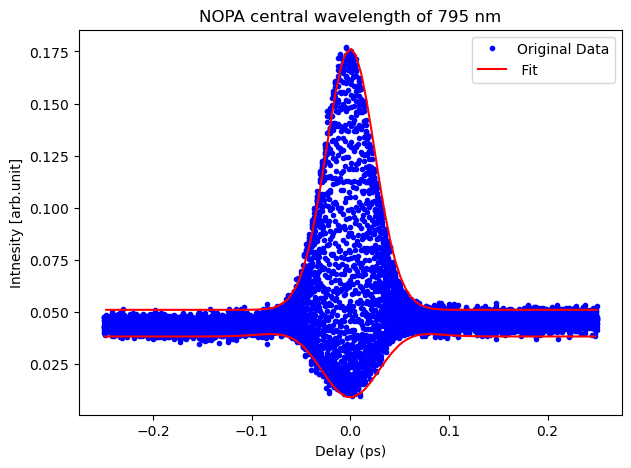

In [6]:
#pulse width of nopa at central wavelength of 795 nm

from scipy.optimize import curve_fit

# Step 1: Load the data
data = np.loadtxt("IF_795nm.txt", skiprows=19)

# Step 2: Define chunk size
chunk_size = 100

# Step 3: Partition the data into chunks
data_chunks = [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]

# Step 4: Initialize lists to store maximum and minimum ACF values with their time coordinates
max_times = []
max_values = []
min_times = []
min_values = []

# Iterate through each chunk of data
for chunk in data_chunks:
    # Find the index of the maximum ACF value in the chunk
    max_index = np.argmax(chunk[:, 1])
    # Find the index of the minimum ACF value in the chunk
    min_index = np.argmin(chunk[:, 1])
    
    # Extract time and ACF value corresponding to maximum and minimum ACF values
    max_time, max_acf = chunk[max_index]
    min_time, min_acf = chunk[min_index]
    
    # Append the values to the respective lists
    max_times.append(max_time)
    max_values.append(max_acf)
    min_times.append(min_time)
    min_values.append(min_acf)

# Step 5: Define the function for curve fitting (Upper Envelope)
def func1(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c + 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 6: Fit the upper envelope
popt_upper, pcov_upper = curve_fit(func1, max_times, max_values, p0=(0.1, 0.1, 0.1, 0.1, 0))

# Step 7: Define the function for curve fitting (Lower Envelope)
def func2(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c - 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 8: Fit the lower envelope
popt_lower, pcov_lower = curve_fit(func2, min_times, min_values, p0=(0.1, 0.1, 0.1, 0.1, 0))

# Step 9: Plotting
plt.figure(figsize=(7, 5))

# Plot original data
plt.plot(data[:, 0], data[:, 1], '.', color='blue',  label='Original Data')

# Plot fitted upper envelope
plt.plot(max_times, func1(max_times, *popt_upper), 'r-', label=' Fit')

# Plot fitted lower envelope
plt.plot(min_times, func2(min_times, *popt_lower), 'r-')

#pulse width measurement

t_p_795=popt_upper[0]*1.177
print(t_p_795,'pulse width')


plt.xlabel('Delay (ps)')
plt.ylabel('Intnesity [arb.unit]')
plt.title('NOPA central wavelength of 795 nm')
plt.legend()

plt.savefig('795nm.png', dpi=300)
plt.show()


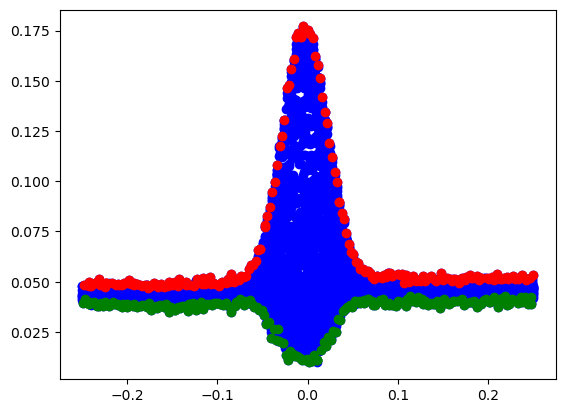

In [134]:
num_avg = 0

inten_max = np.zeros(200)
time_max = np.zeros(200)

inten_min = np.zeros(200)
time_min = np.zeros(200)

for k in range(0,199):
    
    temp_max = data[:,1][k*50]
    temp_min = data[:,1][k*50]
   
    
    
    for i in range(k*50,((k+1)*50)):
                   
        f=data[:,1][i]
        if f> temp_max:
            temp_max = f           
            temp_time_max = i
           
        if f< temp_min:
            temp_min = f           
            temp_time_min = i
    
    temp_max = 0
    temp_min = 0
    for h in range(-num_avg,num_avg+1):
        temp_max =temp_max+ data[:,1][temp_time_max+h]
        temp_min =temp_min+ data[:,1][temp_time_min+h]
        #print(h)      
            
    #print(i)
    #print(temp_max)
    inten_max[k]= temp_max
    time_max[k]= data[:,0][temp_time_max]
 
    inten_min[k]= temp_min
    time_min[k]= data[:,0][temp_time_min]
    
for i in range(199*50,((200)*50-1)):
    f=data[:,1][i]
    if f> temp_max:
        temp_max = f
        temp_time_max = i
    if f< temp_min:
        temp_min = f
        temp_time_min = i
        
        
temp_max = 0
temp_min = 0
for h in range(-num_avg,num_avg+1):
    temp_max =temp_max+ data[:,1][temp_time_max+h]
    temp_min =temp_min+ data[:,1][min(max((temp_time_min+h), 0),min((temp_time_min+h), len(data[:,1]-1)))]

    #print(min(max((temp_time_min+h), 0),min((temp_time_min+h), len(data[:,1]-1))))
        #max((temp_time_min+h), 0)
        #print(h)          
        
#print(f)
#print(temp_max)
inten_max[199]=temp_max
time_max[199]= data[:,0][temp_time_max]

inten_min[199]=temp_min
time_min[199]= data[:,0][temp_time_min]

inten_max = inten_max/((2*num_avg)+1)
inten_min = inten_min/((2*num_avg)+1)


# plt.xlim(0.01,0.0125)

plt.plot(data[:,0], data[:,1],'bo' )
plt.plot(time_max, inten_max, 'ro')
plt.plot(time_min, inten_min, 'go')


0.039434920567720105 pulse width


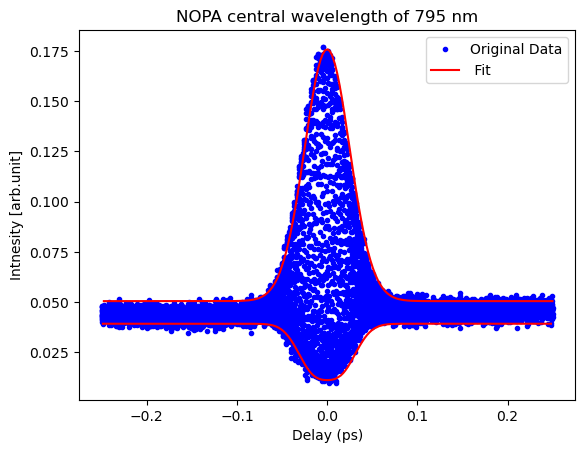

In [135]:



# Step 5: Define the function for curve fitting (Upper Envelope)
def func1(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c + 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 6: Fit the upper envelope
popt_upper, pcov_upper = curve_fit(func1, time_max, inten_max, p0=(0.1, 0.1, 0.1, 0.1, 0))

# Step 7: Define the function for curve fitting (Lower Envelope)
def func2(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c - 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 8: Fit the lower envelope
popt_lower, pcov_lower = curve_fit(func2, time_min, inten_min, p0=(0.1, 0.1, 0.1, 0.1, 0))


# Plot original data
plt.plot(data[:, 0], data[:, 1], '.', color='blue',  label='Original Data')

# Plot fitted upper envelope
plt.plot(time_max, func1(time_max, *popt_upper), 'r-', label=' Fit')

# Plot fitted lower envelope
plt.plot(time_min, func2(time_min, *popt_lower), 'r-')

#pulse width measurement

t_p_826=popt_upper[0]*1.177
print(t_p_826,'pulse width')


plt.xlabel('Delay (ps)')
plt.ylabel('Intnesity [arb.unit]')
plt.title('NOPA central wavelength of 795 nm')
plt.legend()

plt.show()






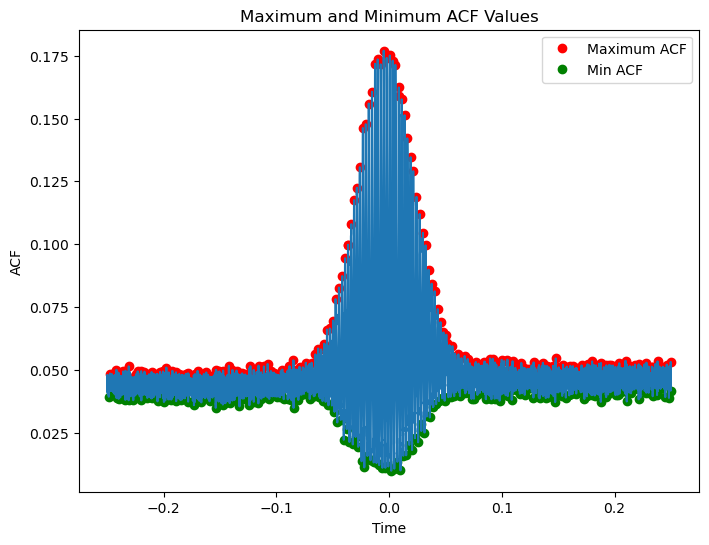

In [139]:

# Step 1: Import data, skip first 19 rows
data = np.loadtxt("IF_795nm.txt", skiprows=19)

# Step 2: Remove the first 19 rows
rdata = data[19:]

# Define chunk size
chunk_size = 50

# Partition the data into chunks
data_chunks = [rdata[i:i+chunk_size] for i in range(0, len(rdata), chunk_size)]

# Function to extract maximum and its time coordinate from a chunk
def extract_max_time(chunk):
    return max(chunk, key=lambda x: x[1])

# Function to extract minimum and its time coordinate from a chunk
def extract_min_time(chunk):
    return min(chunk, key=lambda x: x[1])

# Find maximum and minimum ACF values with their respective time coordinates within each chunk
max_with_time = [extract_max_time(chunk) for chunk in data_chunks]
min_with_time = [extract_min_time(chunk) for chunk in data_chunks]

# Plotting
plt.figure(figsize=(8, 6))

# Plot original data
# plt.plot(rdata[:, 0], rdata[:, 1], '.', color='green', alpha=0.1, label='Original Data')

# Plot maximum and minimum ACF values
max_times, max_values = zip(*max_with_time)
min_times, min_values = zip(*min_with_time)
plt.plot(max_times, max_values, 'o', color='red', label='Maximum ACF')
plt.plot(min_times, min_values, 'o', color='green', label='Min ACF')
# plt.plot(min_times, min_values, '-o', color='black', label='Minimum ACF')


plt.plot(data[:,0], data[:,1] )



plt.xlabel('Time')
plt.ylabel('ACF')
plt.title('Maximum and Minimum ACF Values')
plt.legend()

plt.show()

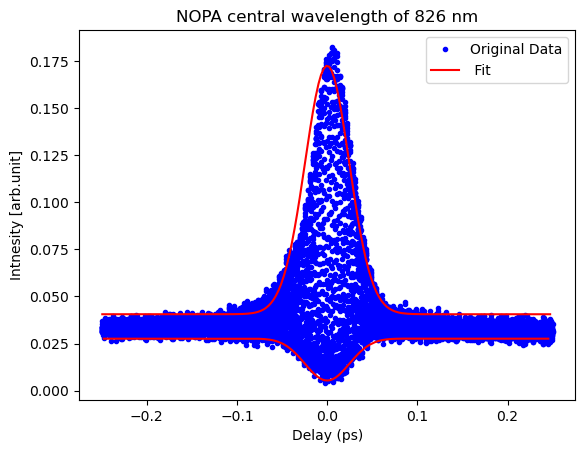

In [136]:
#pulse width of nopa at central wavelength of 826 nm

from scipy.optimize import curve_fit

# Step 1: Load the data
data = np.loadtxt("IF_826nm.txt", skiprows=19)

#Step 2 extracting the uppper and lower envelope

num_avg = 0

inten_max = np.zeros(200)
time_max = np.zeros(200)

inten_min = np.zeros(200)
time_min = np.zeros(200)

for k in range(0,199):
    
    temp_max = data[:,1][k*50]
    temp_min = data[:,1][k*50]
   
    
    
    for i in range(k*50,((k+1)*50)):
                   
        f=data[:,1][i]
        if f> temp_max:
            temp_max = f           
            temp_time_max = i
           
        if f< temp_min:
            temp_min = f           
            temp_time_min = i
    
    temp_max = 0
    temp_min = 0
    for h in range(-num_avg,num_avg+1):
        temp_max =temp_max+ data[:,1][temp_time_max+h]
        temp_min =temp_min+ data[:,1][temp_time_min+h]
        #print(h)      
            
    #print(i)
    #print(temp_max)
    inten_max[k]= temp_max
    time_max[k]= data[:,0][temp_time_max]
 
    inten_min[k]= temp_min
    time_min[k]= data[:,0][temp_time_min]
    
for i in range(199*50,((200)*50-1)):
    f=data[:,1][i]
    if f> temp_max:
        temp_max = f
        temp_time_max = i
    if f< temp_min:
        temp_min = f
        temp_time_min = i
        
        
temp_max = 0
temp_min = 0
for h in range(-num_avg,num_avg+1):
    temp_max =temp_max+ data[:,1][temp_time_max+h]
    temp_min =temp_min+ data[:,1][min(max((temp_time_min+h), 0),min((temp_time_min+h), len(data[:,1]-1)))]

    #print(min(max((temp_time_min+h), 0),min((temp_time_min+h), len(data[:,1]-1))))
        #max((temp_time_min+h), 0)
        #print(h)          
        
#print(f)
#print(temp_max)
inten_max[199]=temp_max
time_max[199]= data[:,0][temp_time_max]

inten_min[199]=temp_min
time_min[199]= data[:,0][temp_time_min]

inten_max = inten_max/((2*num_avg)+1)
inten_min = inten_min/((2*num_avg)+1)



# Step 3: Define the function for curve fitting (Upper Envelope)
def func1(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c + 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 4: Fit the upper envelope
popt_upper, pcov_upper = curve_fit(func1, time_max, inten_max, p0=(0.1, 0.1, 0.1, 0.1, 0))

# Step 5: Define the function for curve fitting (Lower Envelope)
def func2(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c - 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 6: Fit the lower envelope
popt_lower, pcov_lower = curve_fit(func2, time_min, inten_min, p0=(0.1, 0.1, 0.1, 0.1, 0))


# Plot original data
plt.plot(data[:, 0], data[:, 1], '.', color='blue',  label='Original Data')

# Plot fitted upper envelope
plt.plot(time_max, func1(time_max, *popt_upper), 'r-', label=' Fit')

# Plot fitted lower envelope
plt.plot(time_min, func2(time_min, *popt_lower), 'r-')




plt.xlabel('Delay (ps)')
plt.ylabel('Intnesity [arb.unit]')
plt.title('NOPA central wavelength of 826 nm')
plt.legend()

plt.savefig('826nm.png', dpi=300)
plt.show()


-0.0435227424585247 pulse width


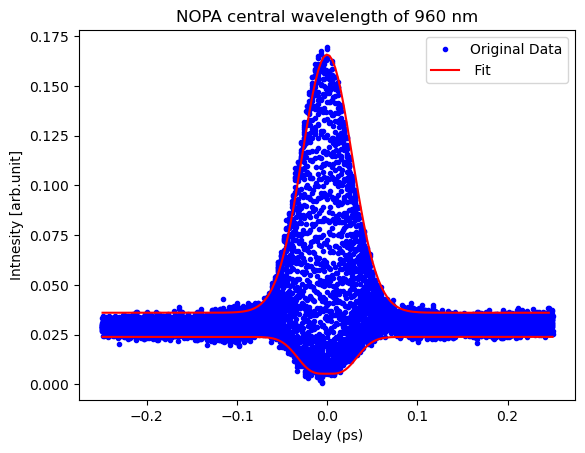

In [137]:
#pulse width of nopa at central wavelength of 960 nm

from scipy.optimize import curve_fit

# Step 1: Load the data
data = np.loadtxt("IF_960nm.txt", skiprows=19)

#Step 2 extracting the uppper and lower envelope

num_avg = 0

inten_max = np.zeros(200)
time_max = np.zeros(200)

inten_min = np.zeros(200)
time_min = np.zeros(200)

for k in range(0,199):
    
    temp_max = data[:,1][k*50]
    temp_min = data[:,1][k*50]
   
    
    
    for i in range(k*50,((k+1)*50)):
                   
        f=data[:,1][i]
        if f> temp_max:
            temp_max = f           
            temp_time_max = i
           
        if f< temp_min:
            temp_min = f           
            temp_time_min = i
    
    temp_max = 0
    temp_min = 0
    for h in range(-num_avg,num_avg+1):
        temp_max =temp_max+ data[:,1][temp_time_max+h]
        temp_min =temp_min+ data[:,1][temp_time_min+h]
        #print(h)      
            
    #print(i)
    #print(temp_max)
    inten_max[k]= temp_max
    time_max[k]= data[:,0][temp_time_max]
 
    inten_min[k]= temp_min
    time_min[k]= data[:,0][temp_time_min]
    
for i in range(199*50,((200)*50-1)):
    f=data[:,1][i]
    if f> temp_max:
        temp_max = f
        temp_time_max = i
    if f< temp_min:
        temp_min = f
        temp_time_min = i
        
        
temp_max = 0
temp_min = 0
for h in range(-num_avg,num_avg+1):
    temp_max =temp_max+ data[:,1][temp_time_max+h]
    temp_min =temp_min+ data[:,1][min(max((temp_time_min+h), 0),min((temp_time_min+h), len(data[:,1]-1)))]

    #print(min(max((temp_time_min+h), 0),min((temp_time_min+h), len(data[:,1]-1))))
        #max((temp_time_min+h), 0)
        #print(h)          
        
#print(f)
#print(temp_max)
inten_max[199]=temp_max
time_max[199]= data[:,0][temp_time_max]

inten_min[199]=temp_min
time_min[199]= data[:,0][temp_time_min]

inten_max = inten_max/((2*num_avg)+1)
inten_min = inten_min/((2*num_avg)+1)



# Step 3: Define the function for curve fitting (Upper Envelope)
def func1(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c + 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 4: Fit the upper envelope
popt_upper, pcov_upper = curve_fit(func1, time_max, inten_max, p0=(0.1, 0.1, 0.1, 0.1, 0))

# Step 5: Define the function for curve fitting (Lower Envelope)
def func2(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c - 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 6: Fit the lower envelope
popt_lower, pcov_lower = curve_fit(func2, time_min, inten_min, p0=(0.1, 0.1, 0.1, 0.1, 0))


# Plot original data
plt.plot(data[:, 0], data[:, 1], '.', color='blue',  label='Original Data')

# Plot fitted upper envelope
plt.plot(time_max, func1(time_max, *popt_upper), 'r-', label=' Fit')

# Plot fitted lower envelope
plt.plot(time_min, func2(time_min, *popt_lower), 'r-')



#pulse width measurement

t_p_960=popt_upper[0]*1.177
print(t_p_960,'pulse width')


plt.xlabel('Delay (ps)')
plt.ylabel('Intnesity [arb.unit]')
plt.title('NOPA central wavelength of 960 nm')
plt.legend()

plt.savefig('960nm.png', dpi=300)
plt.show()


0.04535480417659419 pulse width


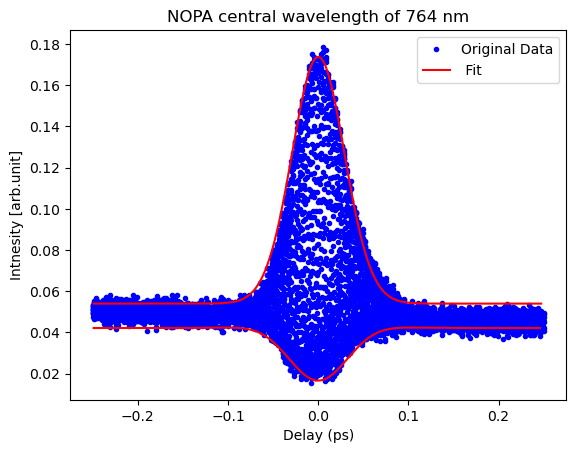

In [138]:

#pulse width of nopa at central wavelength of 764 nm

from scipy.optimize import curve_fit

# Step 1: Load the data
data = np.loadtxt("IF_764nm.txt", skiprows=19)

#Step 2 extracting the uppper and lower envelope

num_avg = 0

inten_max = np.zeros(200)
time_max = np.zeros(200)

inten_min = np.zeros(200)
time_min = np.zeros(200)

for k in range(0,199):
    
    temp_max = data[:,1][k*50]
    temp_min = data[:,1][k*50]
   
    
    
    for i in range(k*50,((k+1)*50)):
                   
        f=data[:,1][i]
        if f> temp_max:
            temp_max = f           
            temp_time_max = i
           
        if f< temp_min:
            temp_min = f           
            temp_time_min = i
    
    temp_max = 0
    temp_min = 0
    for h in range(-num_avg,num_avg+1):
        temp_max =temp_max+ data[:,1][temp_time_max+h]
        temp_min =temp_min+ data[:,1][temp_time_min+h]
        #print(h)      
            
    #print(i)
    #print(temp_max)
    inten_max[k]= temp_max
    time_max[k]= data[:,0][temp_time_max]
 
    inten_min[k]= temp_min
    time_min[k]= data[:,0][temp_time_min]
    
for i in range(199*50,((200)*50-1)):
    f=data[:,1][i]
    if f> temp_max:
        temp_max = f
        temp_time_max = i
    if f< temp_min:
        temp_min = f
        temp_time_min = i
        
        
temp_max = 0
temp_min = 0
for h in range(-num_avg,num_avg+1):
    temp_max =temp_max+ data[:,1][temp_time_max+h]
    temp_min =temp_min+ data[:,1][min(max((temp_time_min+h), 0),min((temp_time_min+h), len(data[:,1]-1)))]

    #print(min(max((temp_time_min+h), 0),min((temp_time_min+h), len(data[:,1]-1))))
        #max((temp_time_min+h), 0)
        #print(h)          
        
#print(f)
#print(temp_max)
inten_max[199]=temp_max
time_max[199]= data[:,0][temp_time_max]

inten_min[199]=temp_min
time_min[199]= data[:,0][temp_time_min]

inten_max = inten_max/((2*num_avg)+1)
inten_min = inten_min/((2*num_avg)+1)



# Step 3: Define the function for curve fitting (Upper Envelope)
def func1(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c + 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 4: Fit the upper envelope
popt_upper, pcov_upper = curve_fit(func1, time_max, inten_max, p0=(0.1, 0.1, 0.1, 0.1, 0))

# Step 5: Define the function for curve fitting (Lower Envelope)
def func2(t, t_g, c, d, e, f):
    return 1 + 2*np.exp(-(t/t_g)**2)*c - 4*np.exp(-3*((t/t_g)**2/4))*d + np.exp(-(t/t_g)**2)*e + f

# Step 6: Fit the lower envelope
popt_lower, pcov_lower = curve_fit(func2, time_min, inten_min, p0=(0.1, 0.1, 0.1, 0.1, 0))


# Plot original data
plt.plot(data[:, 0], data[:, 1], '.', color='blue',  label='Original Data')

# Plot fitted upper envelope
plt.plot(time_max, func1(time_max, *popt_upper), 'r-', label=' Fit')

# Plot fitted lower envelope
plt.plot(time_min, func2(time_min, *popt_lower), 'r-')


#pulse width measurement

t_p_764=popt_upper[0]*1.177
print(t_p_764,'pulse width')


plt.xlabel('Delay (ps)')
plt.ylabel('Intnesity [arb.unit]')
plt.title('NOPA central wavelength of 764 nm')
plt.legend()

plt.savefig('764nm.png', dpi=300)
plt.show()





<function matplotlib.pyplot.show(close=None, block=None)>

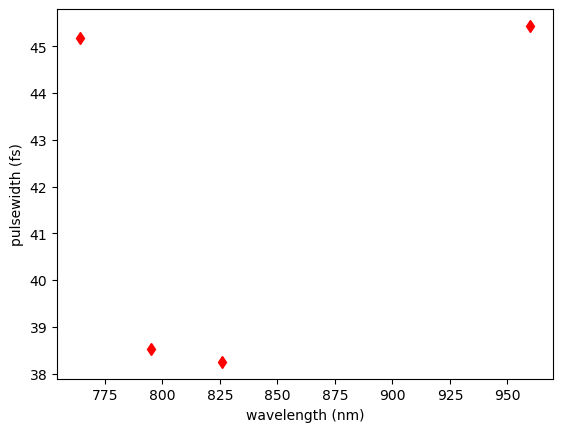

In [11]:
#pulse width of different wavelength

wavelength = [764, 795, 826, 960] #NOPA central wavelength

pw = 1000*np.array([t_p_764, t_p_795, t_p_826, -t_p_960] )#pulse width  gettting from the curve fitting


plt.xlabel('wavelength (nm)')
plt.ylabel('pulsewidth (fs)')

plt.plot(wavelength, pw, 'rd')

plt.savefig('NOPA_pulsewidth.jpg', dpi =300)
plt.show

